In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = sns.load_dataset('titanic')

In [6]:
df.shape

(891, 15)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

In [9]:
# categorical columns
# survived
# PClass
# Sex
# SibSp
# Parch
# Embarked



# Numerical columns
# age
# fare
# passenger id



# Mixed columns
# name
# ticket
# cabin=deck

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# missing values in Age,deck and Embarked columns
# more than 70% values is missing in deck columns so we will drop
# few columns have inappropriate data types

In [14]:
df.drop(columns=['deck'],inplace=True)

In [15]:
# inputing missing values for age


df['age'].fillna(df['age'].mean(),inplace=True)

In [16]:
# inputing missing values for embarked
# finding the most appeared value in embarked column

df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [18]:
# S it is
df['embarked'].fillna('S',inplace=True)

In [20]:
#want to check one more thing
# should i change the sibsp and parch to categories

df['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [21]:

df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [23]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# Changing data type for the following cols
# Survived(category)
# PClass(category)
# Sex(category)
# Age(int)
# Embarked(category)

In [25]:
df['survived']=df['survived'].astype('category')
df['pclass']=df['pclass'].astype('category')
df['sex']=df['sex'].astype('category')
df['age']=df['age'].astype('int')
df['embarked']=df['embarked'].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   pclass       891 non-null    category
 2   sex          891 non-null    category
 3   age          891 non-null    int32   
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(5), float64(1), int32(1), int64(2), object(3)
memory usage: 52.1+ KB


In [27]:
# Five point summary
df.describe()

,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Out of 891 62 people died in the accident


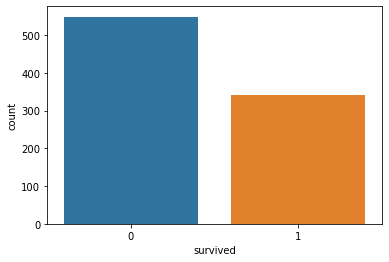

In [28]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(df['survived'])

death_percent=round((df['survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: pclass, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

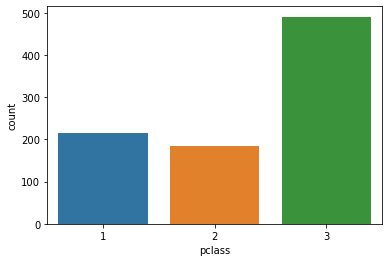

In [29]:
# Pclass column

print((df['pclass'].value_counts()/891)*100)

sns.countplot(df['pclass'])

# Conclusion : Pclass was the most crowded class

male      64.758698
female    35.241302
Name: sex, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

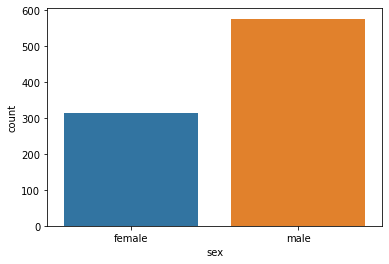

In [30]:
print((df['sex'].value_counts()/891)*100)

sns.countplot(df['sex'])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sibsp', ylabel='count'>

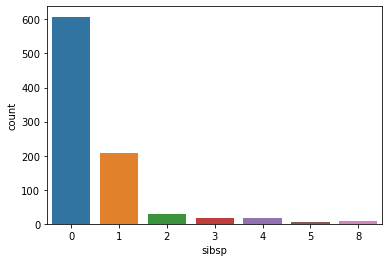

In [31]:
print(df['sibsp'].value_counts())

sns.countplot(df['sibsp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: parch, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parch', ylabel='count'>

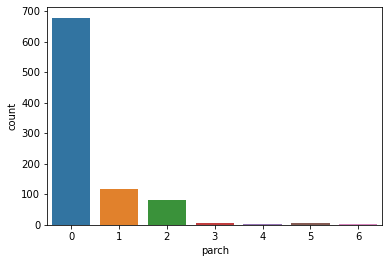

In [32]:
print((df['parch'].value_counts()/891)*100)

sns.countplot(df['parch'])

S    72.502806
C    18.855219
Q     8.641975
Name: embarked, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='count'>

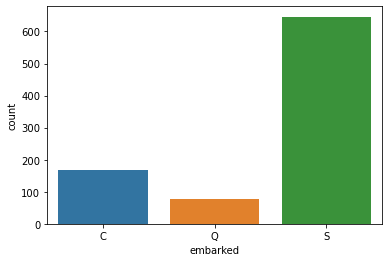

In [33]:
print((df['embarked'].value_counts()/891)*100)

sns.countplot(df['embarked'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.45956263424701577
0.9865867453652877


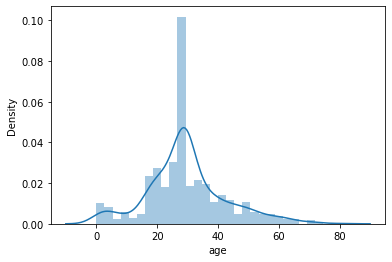

In [34]:
# Age column

sns.distplot(df['age'])

print(df['age'].skew())

print(df['age'].kurt())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

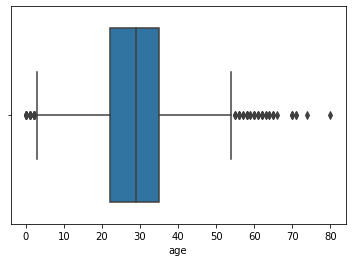

In [36]:
sns.boxplot(df['age'])

In [38]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['age']>60) & (df['age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['age']>=70) & (df['age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


In [39]:
# Conclusion
# For all practical purposes age can be cosidered as normal distribution
# Deeper analysis is required for outlier detection

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

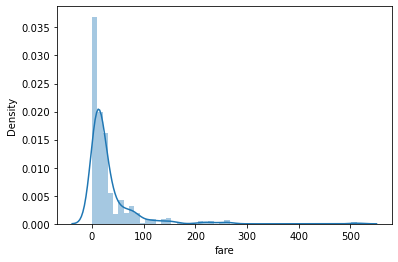

In [40]:
# Fare column

sns.distplot(df['fare'])

In [41]:
print(df['fare'].skew())
print(df['fare'].kurt())

4.787316519674893
33.39814088089868


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

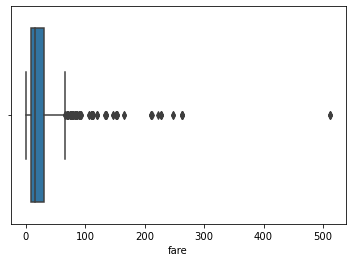

In [42]:
sns.boxplot(df['fare'])

In [43]:
print("People with fare in between $200 and $300",df[(df['fare']>200) & (df['fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


In [44]:
# Conclusion
# Highly skewed data, a lot of people had cheaper tickets
# Outliers are there in the data


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


survived,0,1
pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


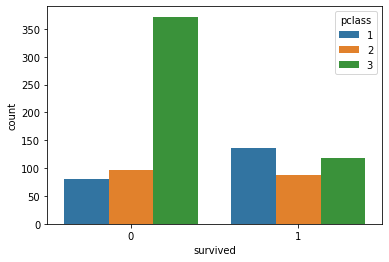

In [45]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(df['survived'], hue=df['pclass'])

pd.crosstab(df['pclass'], df['survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


survived,0,1
sex,,
female,25.8,74.2
male,81.1,18.9


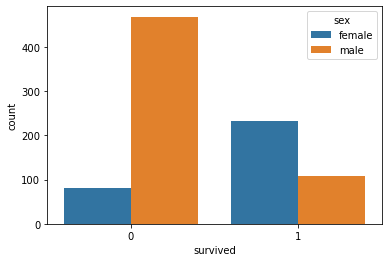

In [46]:
# Survival with Sex

sns.countplot(df['survived'], hue=df['sex'])

pd.crosstab(df['sex'], df['survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


survived,0,1
embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


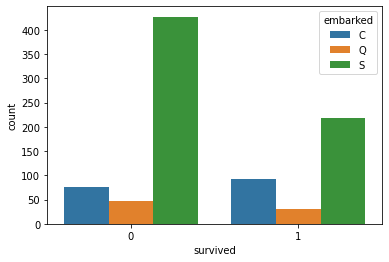

In [47]:
# Survival with Embarked

sns.countplot(df['survived'], hue=df['embarked'])

pd.crosstab(df['embarked'], df['survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

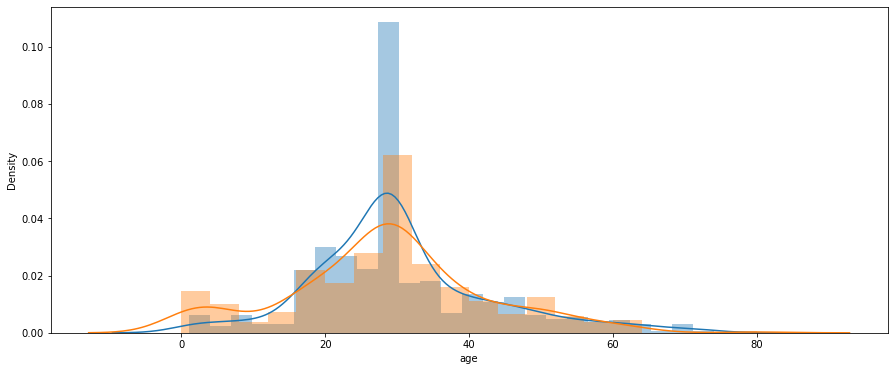

In [48]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['survived']==0]['age'])
sns.distplot(df[df['survived']==1]['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

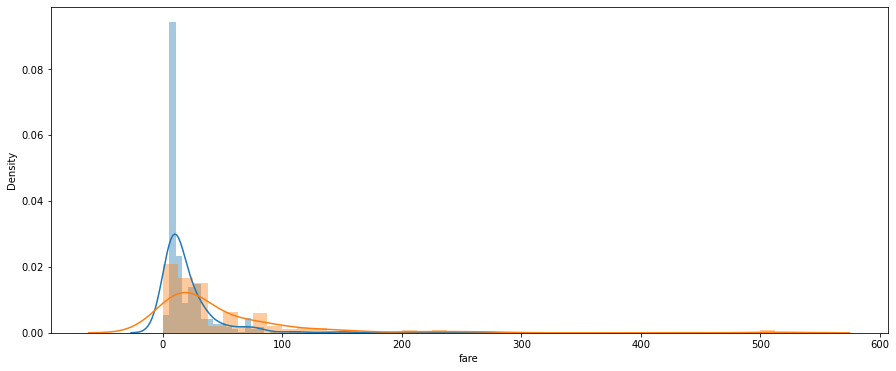

In [49]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['survived']==0]['fare'])
sns.distplot(df[df['survived']==1]['fare'])

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

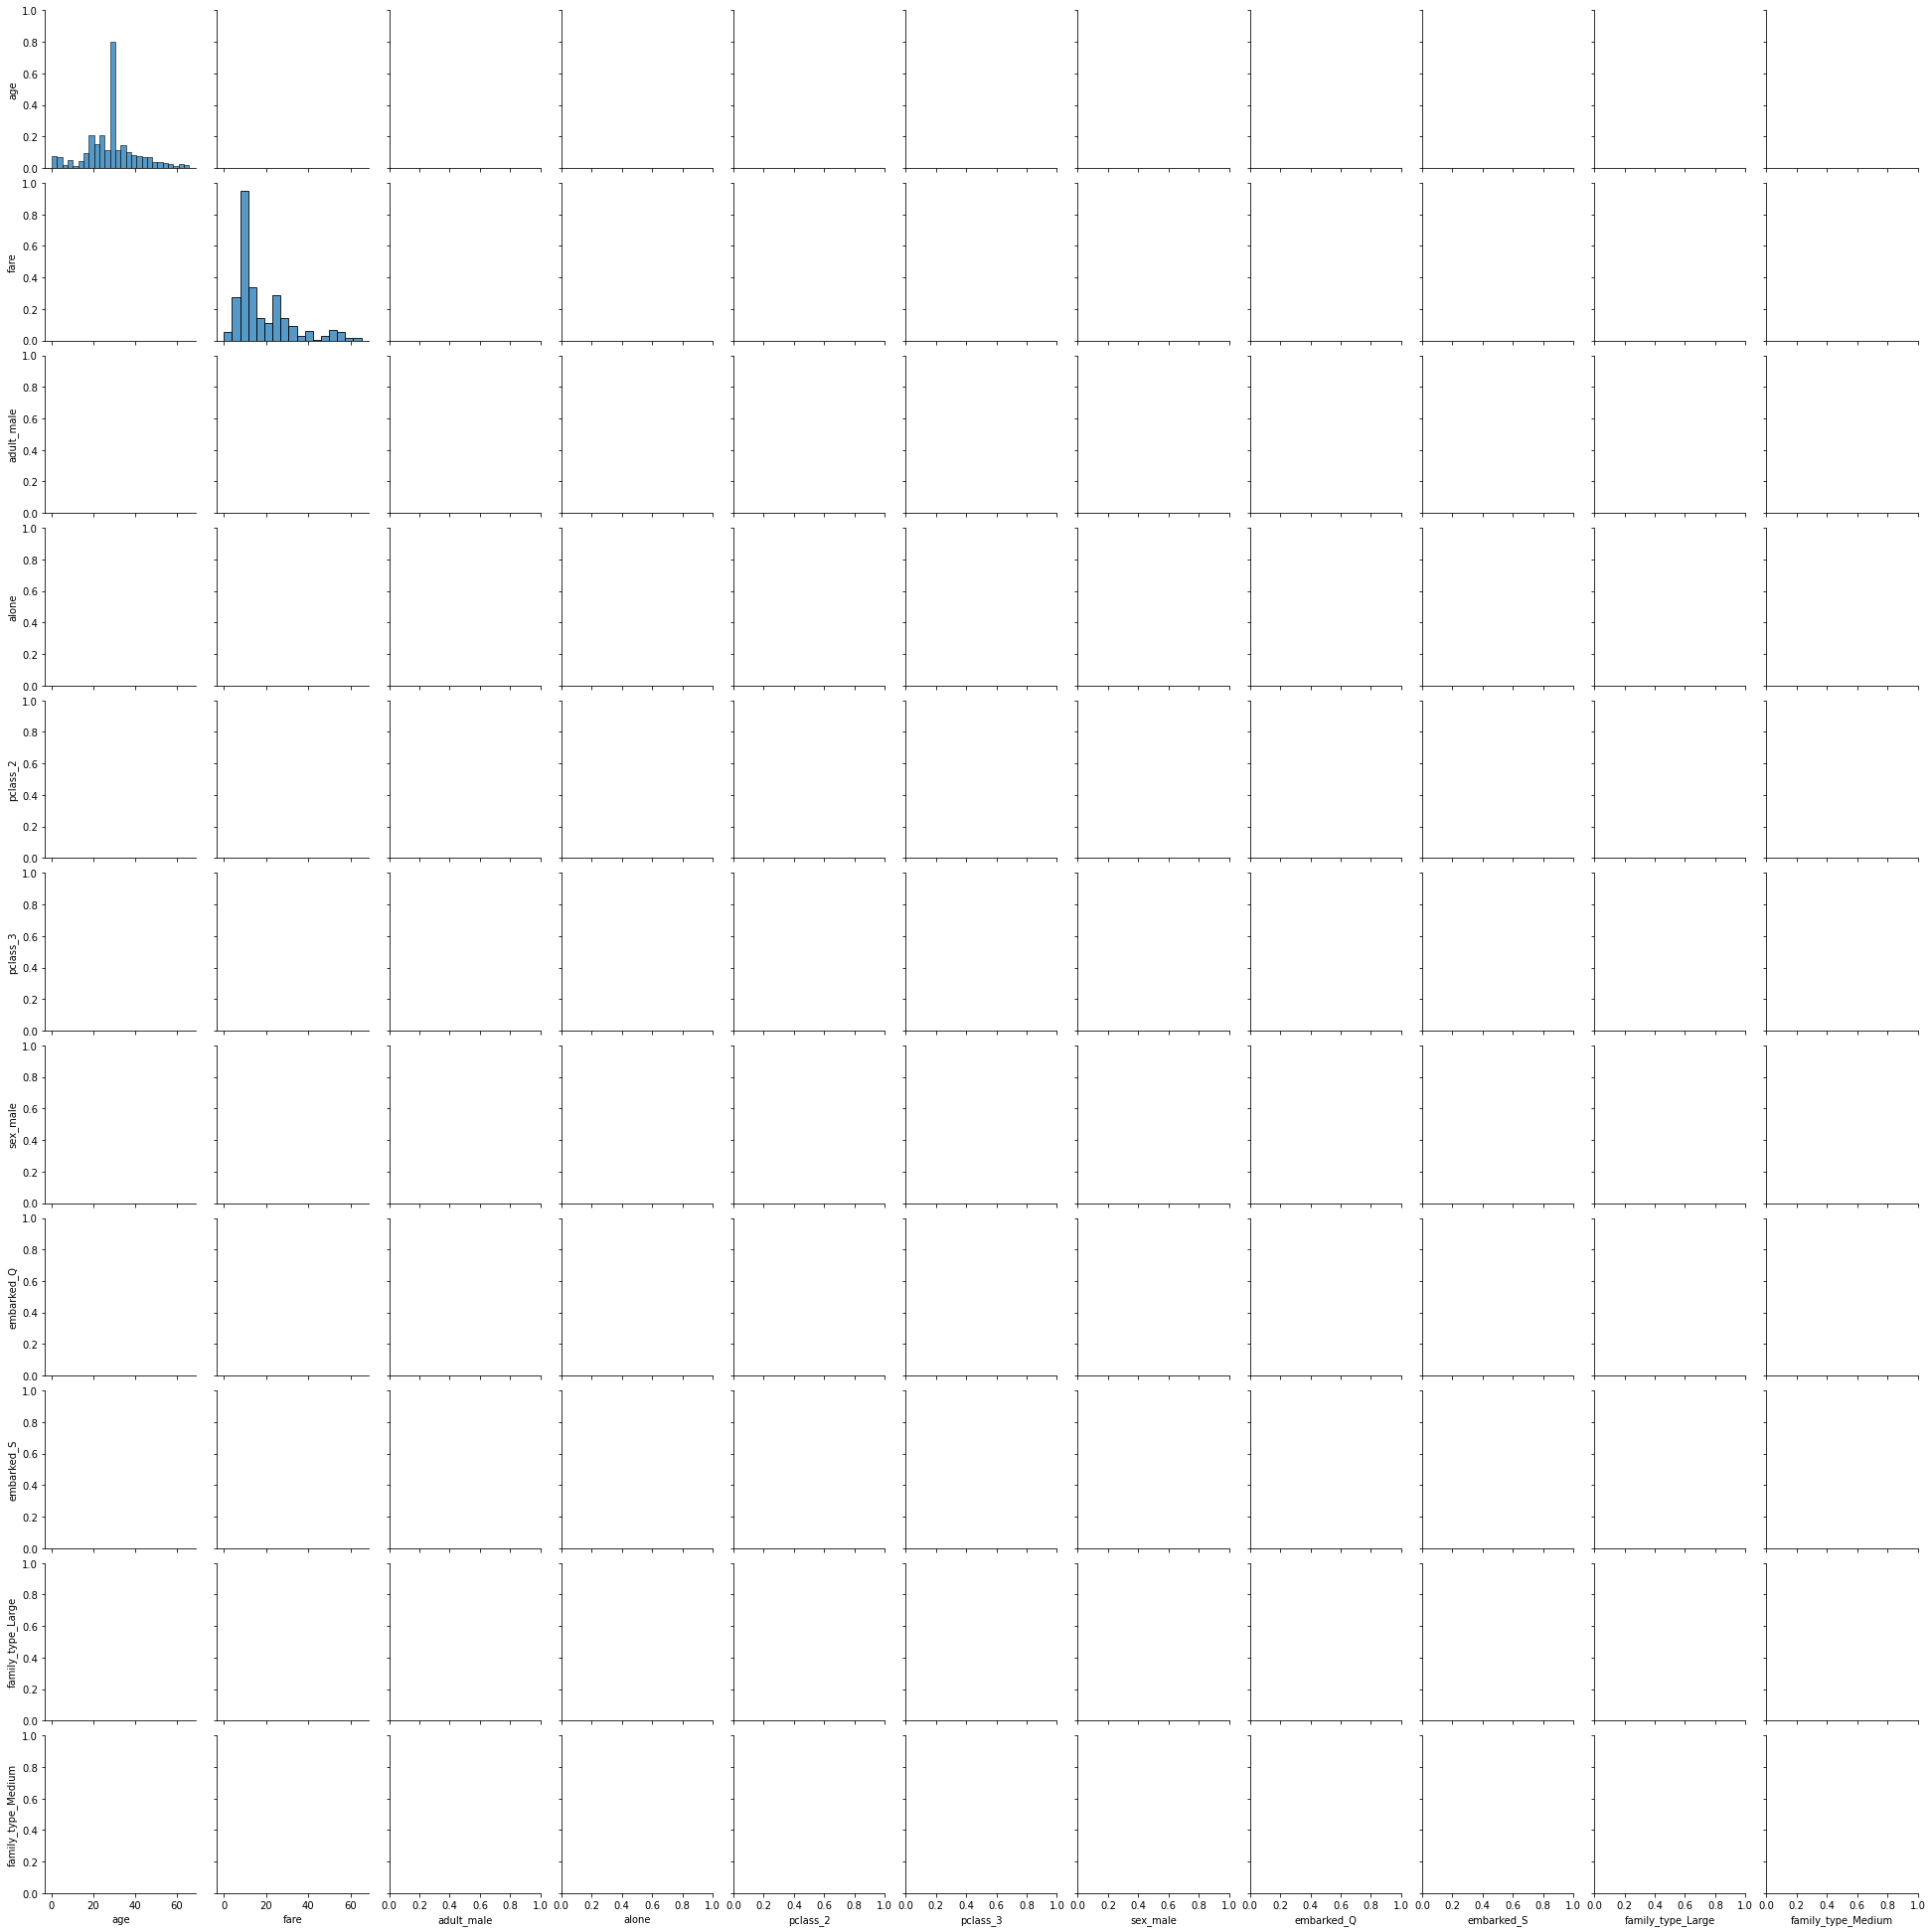

In [68]:
sns.pairplot(df)

<AxesSubplot:>

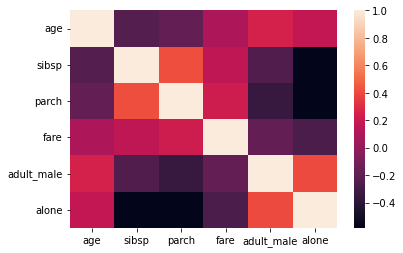

In [51]:
sns.heatmap(df.corr())

In [52]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['parch'] + df['sibsp']

In [53]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
641,1,1,female,24,0,0,69.3000,C,First,woman,False,Cherbourg,yes,True,0
719,0,3,male,33,0,0,7.7750,S,Third,man,True,Southampton,no,True,0
618,1,2,female,4,2,1,39.0000,S,Second,child,False,Southampton,yes,False,3
572,1,1,male,36,0,0,26.3875,S,First,man,True,Southampton,yes,True,0
124,0,1,male,54,0,1,77.2875,S,First,man,True,Southampton,no,False,1


In [54]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [55]:
df['family_type']=df['family_size'].apply(family_type)

In [56]:
df.sample(5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size,family_type
204,1,3,male,18,0,0,8.05,S,Third,man,True,Southampton,yes,True,0,Alone
333,0,3,male,16,2,0,18.00,S,Third,man,True,Southampton,no,False,2,Medium
245,0,1,male,44,2,0,90.00,Q,First,man,True,Queenstown,no,False,2,Medium
133,1,2,female,29,1,0,26.00,S,Second,woman,False,Southampton,yes,False,1,Medium
549,1,2,male,8,1,1,36.75,S,Second,child,False,Southampton,yes,False,2,Medium


In [57]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['sibsp','parch','family_size'],inplace=True)

In [58]:
df.sample(5)

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_type
593,0,3,female,29,7.7500,Q,Third,woman,False,Queenstown,no,False,Medium
675,0,3,male,18,7.7750,S,Third,man,True,Southampton,no,True,Alone
780,1,3,female,13,7.2292,C,Third,child,False,Cherbourg,yes,True,Alone
140,0,3,female,29,15.2458,C,Third,woman,False,Cherbourg,no,False,Medium
374,0,3,female,3,21.0750,S,Third,child,False,Southampton,no,False,Medium


In [59]:
pd.crosstab(df['family_type'], df['survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


In [60]:
# Detecting outliers
# Numerical Data
# if the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
# if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
# Categorical data
# If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [61]:
# handling outliers in age(Almost normal)

df=df[df['age']<(df['age'].mean() + 3 * df['age'].std())]
df.shape

(884, 13)

In [64]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['fare'],25)
Q3= np.percentile(df['fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['fare']>outlier_low) & (df['fare']<outlier_high)]

In [65]:
# One hot encoding

df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['pclass','sex','embarked','family_type'], drop_first=True)


,survived,age,fare,class,who,adult_male,embark_town,alive,alone,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,family_type_Large,family_type_Medium
0,0,22,7.2500,Third,man,True,Southampton,no,False,0,1,1,0,1,0,1
2,1,26,7.9250,Third,woman,False,Southampton,yes,True,0,1,0,0,1,0,0
3,1,35,53.1000,First,woman,False,Southampton,yes,False,0,0,0,0,1,0,1
4,0,35,8.0500,Third,man,True,Southampton,no,True,0,1,1,0,1,0,0
5,0,29,8.4583,Third,man,True,Queenstown,no,True,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,13.0000,Second,man,True,Southampton,no,True,1,0,1,0,1,0,0
887,1,19,30.0000,First,woman,False,Southampton,yes,True,0,0,0,0,1,0,0
888,0,29,23.4500,Third,woman,False,Southampton,no,False,0,1,0,0,1,0,1
889,1,26,30.0000,First,man,True,Cherbourg,yes,True,0,0,1,0,0,0,0


In [66]:
df=pd.get_dummies(data=df, columns=['pclass','sex','embarked','family_type'], drop_first=True)


<AxesSubplot:>

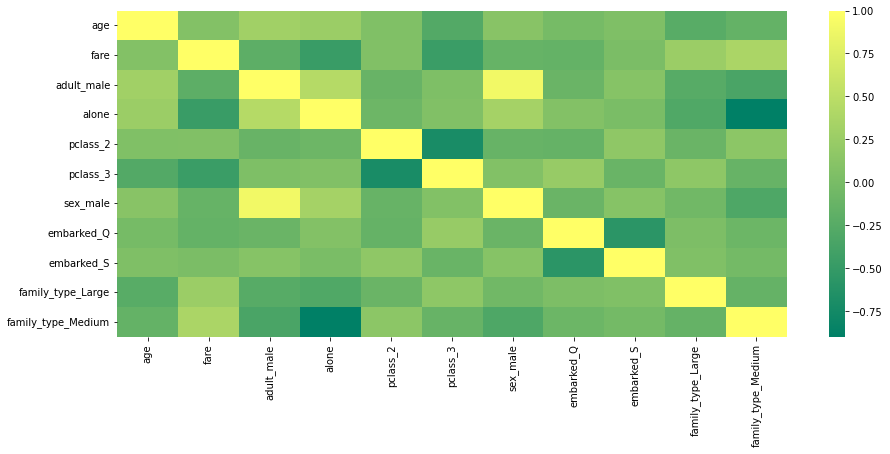

In [67]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='summer')

In [ ]:
# Drawing Conclusions
# Chance of female survival is higher than male survival
# Travelling in Pclass 3 was deadliest
# Somehow, people going to C survived more
# People in the age range of 20 to 40 had a higher chance of not surviving
# People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone
# Communicating Results
# You can write a report/blog etc
# You can give a PPT in front of others
# You can describe the results face to face